In [7]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN
import tensorflow as tf

In [2]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = top_words)
print(X_train[1])

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 69664113be75683a8fe16e3ed0ab59fda8886cb3cd7ada244f7d9544e4676b9f so we will re-download the data.
17464789/17464789 [==============================] - 262s 15us/step
[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9,

In [4]:
X_train.shape

(25000,)

In [10]:
max_word = 500
X_train = tf.keras.utils.pad_sequences(X_train, maxlen = max_word)
X_test = tf.keras.utils.pad_sequences(X_test, maxlen = max_word)

print("Train set : \n", X_train)

Train set : 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [9]:
print("Train set shape : ", X_train.shape)

Eğitim kümesinin boyutları (25000, 500)


In [11]:
#Model Architecture
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length))
model.add(SimpleRNN(64))
model.add(Dense(1, activation = "sigmoid"))

In [12]:
model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
    )

In [13]:
import tensorflow as tf
tf.keras.utils.plot_model(model, "IMDB_RNN_modeli.png", show_shapes = True, show_layer_names = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                6208      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 166,273
Trainable params: 166,273
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 512,
    validation_split = 0.2
)

Epoch 1/10
40/40 [==============================] - 30s 682ms/step - loss: 0.6918 - accuracy: 0.5273 - val_loss: 0.6829 - val_accuracy: 0.5642
Epoch 2/10
40/40 [==============================] - 27s 686ms/step - loss: 0.6209 - accuracy: 0.6921 - val_loss: 0.5505 - val_accuracy: 0.7480
Epoch 3/10
40/40 [==============================] - 28s 699ms/step - loss: 0.4172 - accuracy: 0.8217 - val_loss: 0.4475 - val_accuracy: 0.7942
Epoch 4/10
40/40 [==============================] - 28s 706ms/step - loss: 0.3509 - accuracy: 0.8565 - val_loss: 0.3862 - val_accuracy: 0.8364
Epoch 5/10
40/40 [==============================] - 28s 708ms/step - loss: 0.2828 - accuracy: 0.8885 - val_loss: 0.3659 - val_accuracy: 0.8468
Epoch 6/10
40/40 [==============================] - 31s 768ms/step - loss: 0.1828 - accuracy: 0.9353 - val_loss: 0.3895 - val_accuracy: 0.8428
Epoch 7/10
40/40 [==============================] - 32s 793ms/step - loss: 0.1174 - accuracy: 0.9627 - val_loss: 0.4296 - val_accuracy: 0.8296

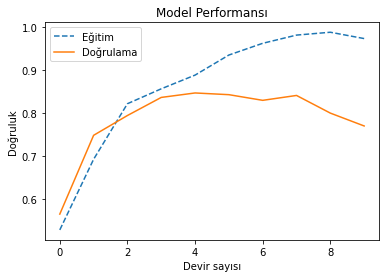

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], "--")
plt.plot(history.history["val_accuracy"])
plt.title("Model Performansı")
plt.ylabel("Doğruluk")
plt.xlabel("Devir sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper left")
plt.show()

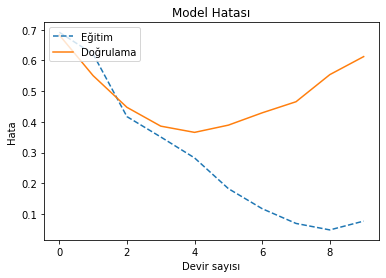

In [16]:
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.ylabel("Hata")
plt.xlabel("Devir sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper left")
plt.show()

In [17]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin doğruluğu: %.2f%%" % (performans[1]*100))

Modelin doğruluğu: 77.25%
